# Build the Machine Learning Model

## Import Package

In [2]:
%pip install seaborn
%pip install -U scikit-learn

     |████████████████████████████████| 294 kB 982 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 12.1 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 4.0 MB/s eta 0:00:01    |███▎                            | 4.0 MB 5.9 MB/s eta 0:00:06     |██████████████████              | 22.1 MB 4.8 MB/s eta 0:00:04
     |████████████████████████████████| 301 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 2.4 MB/s eta 0:00:01    |█████████████                   | 8.4 MB 1.9 MB/s eta 0:00:07
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kern

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, accuracy_score

from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing

In [2]:
option = pd.read_csv('option_data.csv')
option.head()

,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under


In [4]:
option.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   Value       5000 non-null   float64
 2   S           5000 non-null   float64
 3   K           5000 non-null   int64  
 4   tau         5000 non-null   float64
 5   r           5000 non-null   float64
 6   BS          5000 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 273.6+ KB


In [3]:
option.isnull().sum()

Unnamed: 0    0
Value         0
S             0
K             0
tau           0
r             0
BS            0
dtype: int64

In [4]:
option = option.drop(columns = ['Unnamed: 0'])
option.shape

(5000, 6)

In [6]:
X = option.drop(columns = ['Value', 'BS'])
y = option['Value']

re_X_train, re_X_test, re_y_train, re_y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

In [7]:
re_X_train.shape

(4000, 4)

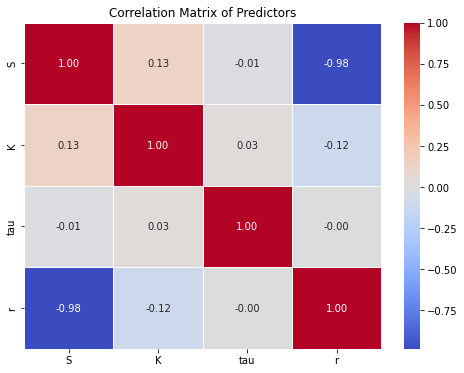

In [8]:
correlation_matrix = re_X_train.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictors')
plt.show()

## Build the Model

In [9]:
random_forest_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the Random Forest regressor to the training data
random_forest_regressor.fit(re_X_train, re_y_train)

# Predict on the testing set
predictions = random_forest_regressor.predict(re_X_test)

# result table
result = re_X_test
result['Value'] = re_y_test
result['Predicted_Value'] = predictions.tolist()
result.head()

,S,K,tau,r,Value,Predicted_Value
1501,1401.44,1625,0.090411,0.0116,1.000,1.4550
2586,1527.46,1350,0.232877,0.0106,224.000,219.4900
2653,1329.78,1300,0.676712,0.0123,147.625,154.8975
1055,1424.24,1375,0.358904,0.0114,116.000,120.9100
705,1341.93,1200,0.295890,0.0122,174.375,169.4900


In [10]:
# Calculate evaluation metrics
rf_mse = mean_squared_error(re_y_test, predictions)
print("Mean Squared Error: ", rf_mse)

rf_r2 = r2_score(re_y_test, predictions)
print("R-squared (Random Forest):", rf_r2)

Mean Squared Error:  55.937986762109375
R-squared (Random Forest): 0.9964970515427147


## Save the model

In [11]:
import pickle

In [12]:
pickle.dump(random_forest_regressor, open('model.pkl', 'wb'))